# Python Tutorial --- the very basics

Import packages.
If you don't have a certain package, e.g. 'newpackage', just type  
`pip install newpackage`

In [1]:
import urllib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

This is how you download data from Thingspeak

In [2]:
# define what to download
channels = "1690490"
fields = "1,2,3,4,6,7"
minutes = "30"
filename = "test.csv"
# https://www.mathworks.com/help/thingspeak/readdata.html
# format YYYY-MM-DD%20HH:NN:SS
start = "2022-05-01%2000:00:00"
end = "2022-05-08%2000:00:00"

# download using Thingspeak's API
# url = f"https://api.thingspeak.com/channels/{channels}/fields/{fields}.csv?minutes={minutes}"
url = f"https://api.thingspeak.com/channels/{channels}/fields/{fields}.csv?start={start}&end={end}"
data = urllib.request.urlopen(url)
d = data.read()

# save data to csv
file = open(filename, "w")
file.write(d.decode('UTF-8'))
file.close()

You can load the data using Pandas. Here we create a "dataframe", which is a fancy name for a table.

In [3]:
# load data
df = pd.read_csv("test.csv")
# rename columns
df = df.rename(columns={"created_at": "timestamp",
                        "field1": "T1",
                        "field2": "RH",
                        "field3": "T2",
                        "field4": "motion_sensor",
                        "field6": "VWC",
                        "field7": "VPD",})
# set timestamp as index
df['timestamp'] = pd.to_datetime(df['timestamp'])
df = df.set_index('timestamp')


Make a first graph

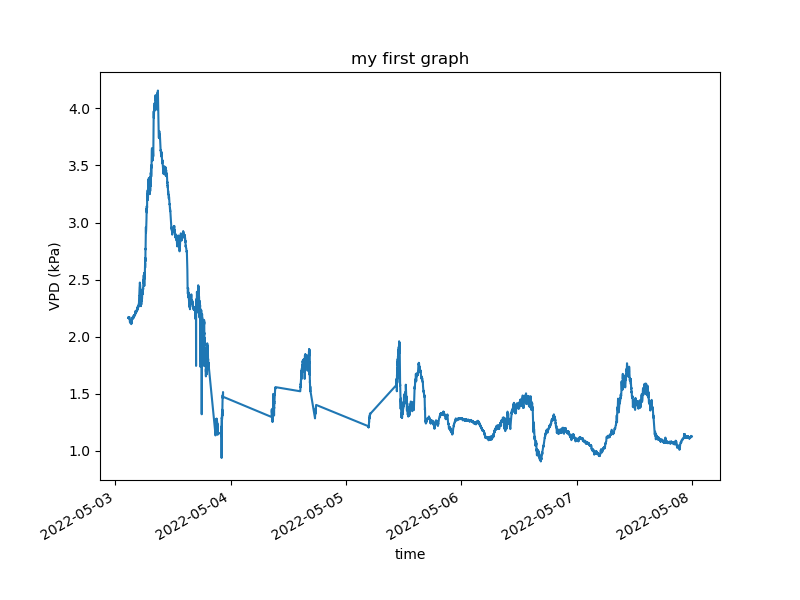

In [4]:
%matplotlib widget

fig, ax = plt.subplots(1, figsize=(8,6))

ax.plot(df['VPD'])
# add labels and title
ax.set(xlabel = "time",
       ylabel = "VPD (kPa)",
       title = "my first graph")
# makes slated dates
plt.gcf().autofmt_xdate()  


Show two columns in the same graph

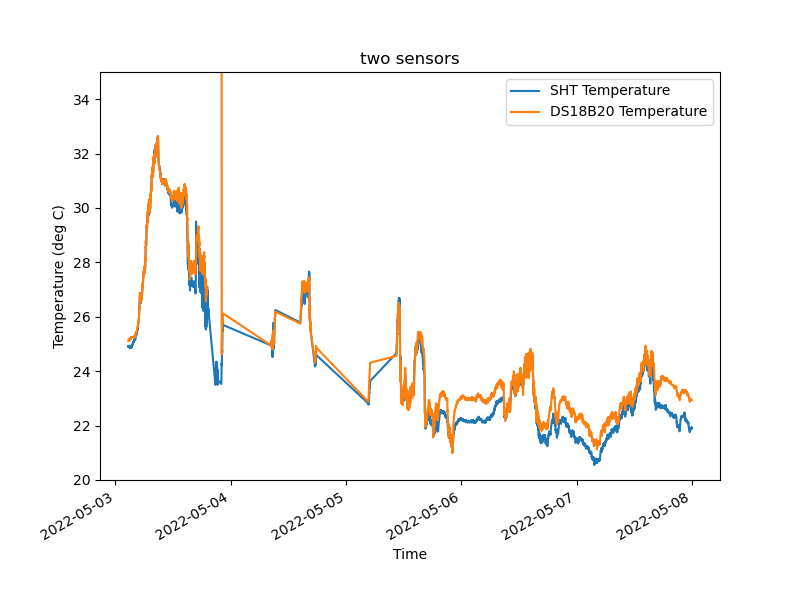

In [5]:
%matplotlib widget

fig, ax = plt.subplots(1, figsize=(8,6))

ax.plot(df['T1'], color="tab:blue", label="SHT Temperature")
ax.plot(df['T2'], color="tab:orange", label="DS18B20 Temperature")
# add labels and title
ax.set(xlabel = "Time",
       ylabel = "Temperature (deg C)",
       title = "two sensors",
       ylim=[20,35],
       )
# makes slated dates
plt.gcf().autofmt_xdate()
ax.legend(loc="upper right")

You can calculate new things and save them as new columns of your dataframe.

In [6]:
def calculate_es(T):
    es = np.exp((16.78 * T - 116.9) / (T + 237.3))
    return es

def calculate_ed(es, rh):
    return es * rh / 100.0

es = calculate_es(df['T1'])
ed = calculate_ed(es, df['RH'])
df['VPD2'] = es - ed

See if what you calculated makes sense.

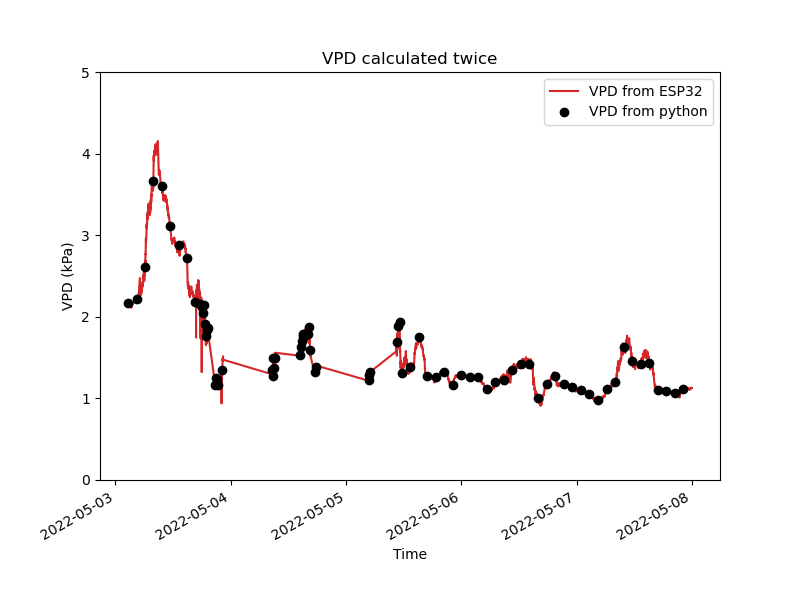

In [7]:
%matplotlib widget

fig, ax = plt.subplots(1, figsize=(8,6))

ax.plot(df['VPD'], color="tab:red", label="VPD from ESP32")
ax.plot(df['VPD2'][::100], "o", color="black", label="VPD from python")
# add labels and title
ax.set(xlabel = "Time",
       ylabel = "VPD (kPa)",
       title = "VPD calculated twice",
       ylim=[0,5],
       )
# makes slated dates
plt.gcf().autofmt_xdate()
ax.legend(loc="upper right")

You might want two y axes.

Text(0, 0.5, 'Temperature (deg C)')

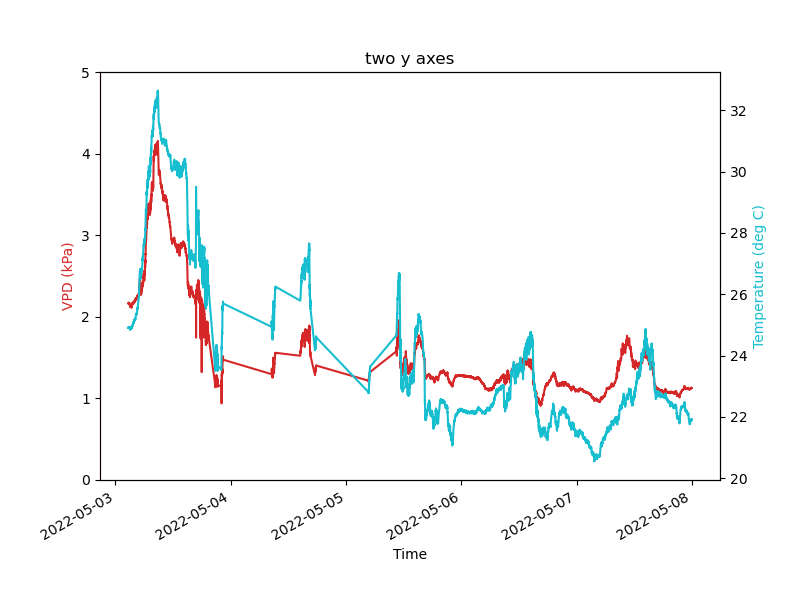

In [8]:
%matplotlib widget

fig, ax = plt.subplots(1, figsize=(8,6))

ax.plot(df['VPD'], color="tab:red", label="VPD")
plt.gcf().autofmt_xdate()
ax2 = ax.twinx()
ax2.plot(df['T1'], color="tab:cyan", label="Temperature")
ax.set(xlabel = "Time",
       title = "two y axes",
       ylim=[0,5],
       )
ax.set_ylabel('VPD (kPa)', color='tab:red')
ax.spines['left'].set_color('red')

ax2.set_ylabel('Temperature (deg C)', color='tab:cyan')